Data Importing and Preprocessing 

In [78]:
# import
import numpy as np
import random
import scipy
import sklearn
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
random.seed(18636552)

In [79]:
# load data
df = pd.read_csv('/Users/amber/Desktop/musicData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [3]:
df.sample(20)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
42007,73917.0,György Ligeti,Ligeti : Requiem : II Kyrie,34.0,0.986000,0.061,395027.0,0.207,0.918000,G,0.1080,-19.225,Minor,0.0437,67.312,4-Apr,0.0268,Classical
2137,51366.0,YOOKiE,Voodoo,29.0,0.001840,0.656,179212.0,0.986,0.013100,F#,0.2280,-3.250,Major,0.2750,149.983,4-Apr,0.2860,Electronic
16412,80634.0,Action Bronson,Terry,48.0,0.707000,0.376,289493.0,0.620,0.000000,C#,0.1070,-5.840,Major,0.3670,87.538,4-Apr,0.0477,Alternative
20911,49987.0,Eric Paslay,Angels In This Town,46.0,0.002280,0.526,181653.0,0.873,0.000000,E,0.3680,-4.422,Minor,0.0400,?,4-Apr,0.7310,Country
18661,76914.0,Red Hot Chili Peppers,Charlie,57.0,0.019800,0.600,277533.0,0.912,0.000065,G,0.0883,-3.449,Minor,0.0724,110.339,4-Apr,0.5060,Alternative
38608,38643.0,empty_field,Isn't He (This Jesus) [feat. Natalie Grant],56.0,0.118000,0.224,590437.0,0.467,0.000000,G#,0.0881,-7.287,Major,0.0321,144.012,4-Apr,0.0622,Rock
15846,65601.0,anders,With or Without,48.0,0.123000,0.663,202090.0,0.348,0.000000,A#,0.1270,-12.040,Minor,0.0471,87.527,4-Apr,0.3720,Alternative
15986,37788.0,WATCH THE DUCK,There You Are,47.0,0.066000,0.439,226039.0,0.707,0.000044,G#,0.1010,-6.146,Major,0.0908,?,3-Apr,0.7560,Alternative
39001,79066.0,Queens of the Stone Age,The Way You Used To Do,56.0,0.010200,0.474,274282.0,0.843,0.104000,C,0.3620,-5.909,Major,0.2720,97.691,4-Apr,0.4330,Rock
35507,76067.0,Queen,Bicycle Race - Remastered 2011,62.0,0.072400,0.493,180813.0,0.680,0.000000,A#,0.1100,-6.376,Minor,0.0976,83.971,4-Apr,0.5680,Rock


In [4]:
# we can see there is nan and ?
# replace all "?" and "NaN" values with NaN
df.replace({ 'nan': np.nan}, inplace=True)

# drop all rows with NaN values
df.dropna(inplace=True)


In [5]:
#Let's first drop obtained_date Column and instance_id columns since that should not contribute to classification
df = df.drop(columns=["obtained_date"])

In [6]:
# Since instance_id, artist_name and track_name will not be used in the futher classification, I will set them as index
df = df.set_index(['instance_id', 'artist_name', 'track_name'])

In [7]:
# In tempo column we see some ?.  Let's replace '?' and NaN values with NaN
df['tempo'] = df['tempo'].replace('?', np.nan)

# Then, convert 'tempo' column to numeric
df['tempo'] = pd.to_numeric(df['tempo'], errors='coerce')

# Calculate average to fill in Nan
tempo_avg = df['tempo'].mean()

# Replace NaN values with average
df['tempo'].fillna(tempo_avg, inplace=True)

In [8]:
# For columns 	popularity	acousticness	danceability	duration_ms	energy	instrumentalness liveness	loudness tempo	valence, they are all numeric. So I will check if there are outliners
# select the column of interest
columns = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness','liveness', 'loudness', 'valence','tempo' ]
for col in columns:
    # calculate the IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # define the upper and lower bounds for outliers
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # identify outliers
    outliers = df[(df[col] > upper_bound) | (df[col] < lower_bound)][col]

    # print the outliers
    print("Outliers in column", col, "are:")
    print(outliers)

Outliers in column popularity are:
instance_id  artist_name   track_name                                    
49721.0      DJ Snake      Taki Taki (with Selena Gomez, Ozuna & Cardi B)    96.0
49915.0      empty_field   Glass Hearts (How Much You Mean)                   0.0
22302.0      Underworld    Threat Of Rain                                     0.0
84770.0      Underworld    Appleshine - Film Edit                             0.0
43800.0      Wuki          IGD                                                0.0
                                                                             ... 
86123.0      Paulo Londra  Adan y Eva                                        95.0
71912.0      Flipp Dinero  Leave Me Alone                                    90.0
27221.0      Meek Mill     Going Bad (feat. Drake)                           95.0
28227.0      XXXTENTACION  SAD!                                              92.0
55022.0      XXXTENTACION  Moonlight                                   

In [9]:
# we noticed that duration_ms has some outliers with duration_ms of -1.0, Let's take a closer look. 
row = df[df['duration_ms'] == -1.0]
count = df[df['duration_ms'] == -1].shape[0]
print("Number of rows with duration_ms = -1:", count)

Number of rows with duration_ms = -1: 4939


In [10]:
# select the rows where duration_ms is -1
mask = df['duration_ms'] == -1.0
mean_duration = df['duration_ms'].mean()
# replace duration_ms with 0 for those rows
df.loc[mask, 'duration_ms'] = mean_duration

* todo: deal with duration_ms

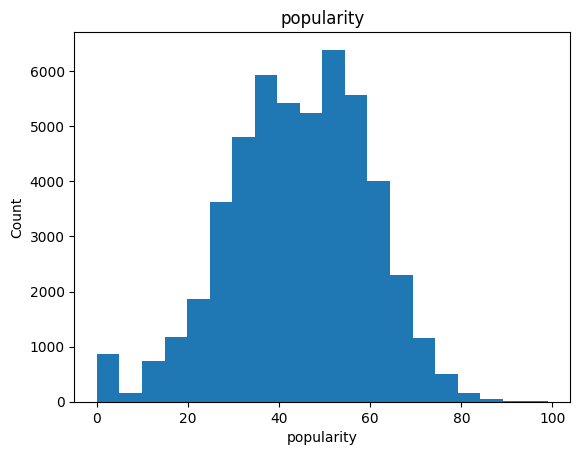

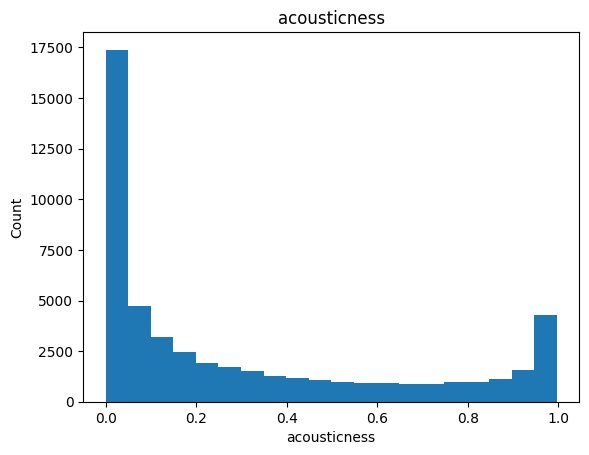

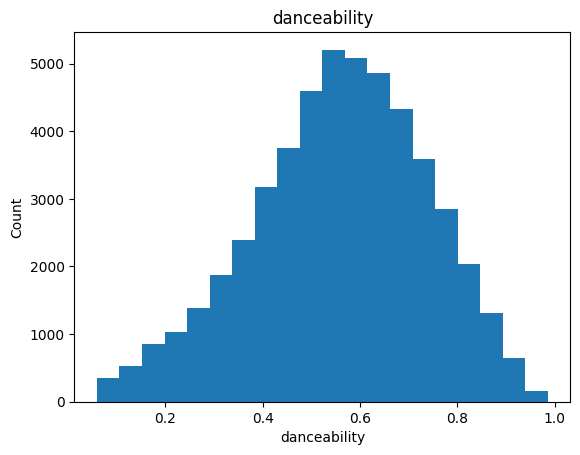

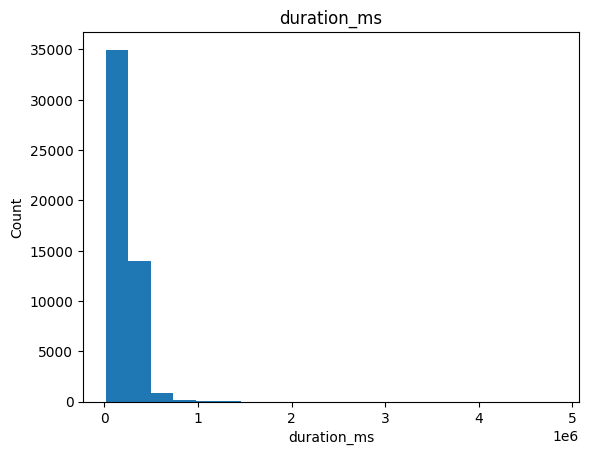

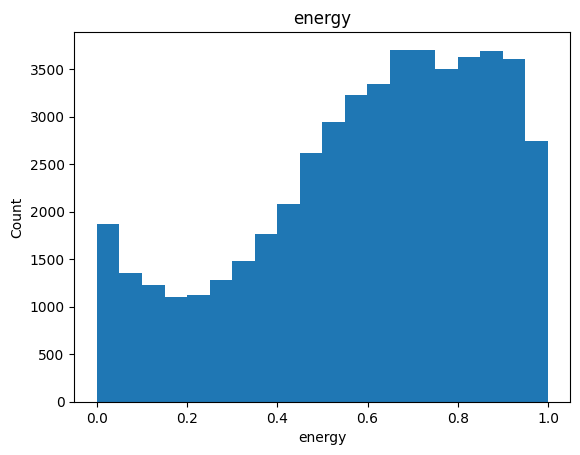

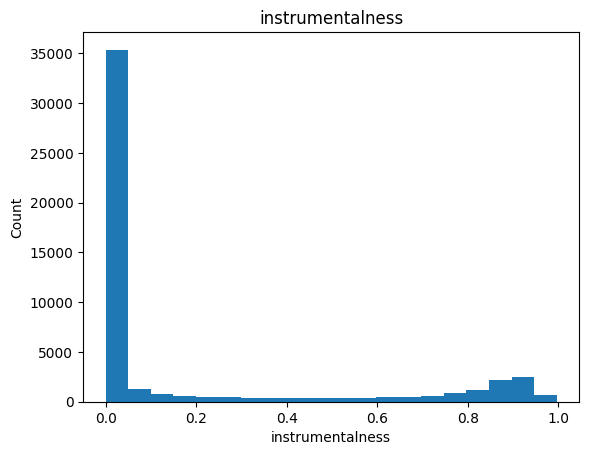

In [11]:
# I want to see the distribution of those columns
columns = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness']

for col in columns:
    plt.hist(df[col], bins=20)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

* Let's move onto catagrical data key, mode

In [12]:
unique_values = df['key'].unique()
print(unique_values)

['A#' 'D' 'G#' 'C#' 'F#' 'B' 'G' 'F' 'A' 'C' 'E' 'D#']


In [13]:
unique_values = df['mode'].unique()
print(unique_values)

['Minor' 'Major']


In [14]:
# Encode Key and mode to one hot encoding
columns_to_encode = ['key', 'mode']

for col in columns_to_encode:
    encoded_cols = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, encoded_cols], axis=1)

# drop the original columns after encoding
df = df.drop(columns=columns_to_encode)

    
df.sample(20)


,,,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
instance_id,artist_name,track_name,,,,,,,,,,,,,,,,,,,,,
71661.0,Steely Dan,Change Of The Guard,42.0,0.22200,0.705,2.197070e+05,0.667,0.000126,0.0654,-10.566,0.0280,118.606000,...,1,0,0,0,0,0,0,0,1,0
89909.0,The Game,Ali Bomaye,66.0,0.02030,0.378,3.727070e+05,0.691,0.000000,0.4000,-5.308,0.4610,75.162000,...,0,0,0,0,0,0,0,0,0,1
72813.0,Alice Cooper,Welcome to My Nightmare,38.0,0.30500,0.438,3.206400e+05,0.717,0.001220,0.0700,-13.226,0.0500,112.408000,...,0,0,0,0,0,0,0,0,0,1
51716.0,Aventura,Our Song,54.0,0.44800,0.797,2.680530e+05,0.542,0.000008,0.1220,-8.411,0.0350,119.952961,...,0,0,0,0,0,0,0,1,0,1
80688.0,Vick Allen,When You Pack Your Bag,19.0,0.22600,0.859,2.212526e+05,0.598,0.001170,0.1010,-5.901,0.0453,119.961000,...,0,0,0,0,0,0,0,0,0,1
88626.0,Miranda Lambert,Kerosene,57.0,0.00687,0.628,2.212526e+05,0.920,0.000053,0.3370,-3.252,0.0287,126.998000,...,0,0,0,0,0,0,1,0,1,0
74780.0,Rusko,Everyday - Netsky Remix,46.0,0.00039,0.362,2.516700e+05,0.933,0.807000,0.2640,-5.056,0.0522,119.952961,...,0,1,0,0,0,0,0,0,1,0
82473.0,Baauer,Harlem Shake,58.0,0.01110,0.452,1.966640e+05,0.794,0.001820,0.4160,-5.151,0.0483,137.825000,...,0,0,0,0,0,0,0,0,1,0
42014.0,Massive Attack,Antistar - Includes Hidden Track 'LP4',33.0,0.55300,0.243,1.180560e+06,0.347,0.943000,0.0828,-14.961,0.0860,73.722000,...,0,0,0,0,0,0,1,0,1,0


In [15]:
#check the unique label in our classfication 
unique_values = df['music_genre'].unique()
print(unique_values)

['Electronic' 'Anime' 'Jazz' 'Alternative' 'Country' 'Rap' 'Blues' 'Rock'
 'Classical' 'Hip-Hop']


In [16]:
df['music_genre'], _ = pd.factorize(df['music_genre'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 50000 entries, (32894.0, 'Röyksopp', "Röyksopp's Night Out") to (63470.0, 'Naughty By Nature', 'Hip Hop Hooray')
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        50000 non-null  float64
 1   acousticness      50000 non-null  float64
 2   danceability      50000 non-null  float64
 3   duration_ms       50000 non-null  float64
 4   energy            50000 non-null  float64
 5   instrumentalness  50000 non-null  float64
 6   liveness          50000 non-null  float64
 7   loudness          50000 non-null  float64
 8   speechiness       50000 non-null  float64
 9   tempo             50000 non-null  float64
 10  valence           50000 non-null  float64
 11  music_genre       50000 non-null  int64  
 12  key_A             50000 non-null  uint8  
 13  key_A#            50000 non-null  uint8  
 14  key_B             50000 non-null  uint8  
 15  

In [18]:
# check again to see if we still have Nan
nan_mask = df.isnull()

# Count the number of NaN values in each column
nan_counts = nan_mask.sum()

columns_with_nan = nan_counts[nan_counts > 0].index
print("Columns with NaN values:")
print(columns_with_nan)

Columns with NaN values:
Index([], dtype='object')


* Now Let's move to Dimension Reduction， I am planning to use PCA and t-SNE

In [19]:
X = df.drop("music_genre", axis=1)  
y = df["music_genre"]

print(X.shape, y.shape)

(50000, 25) (50000,)


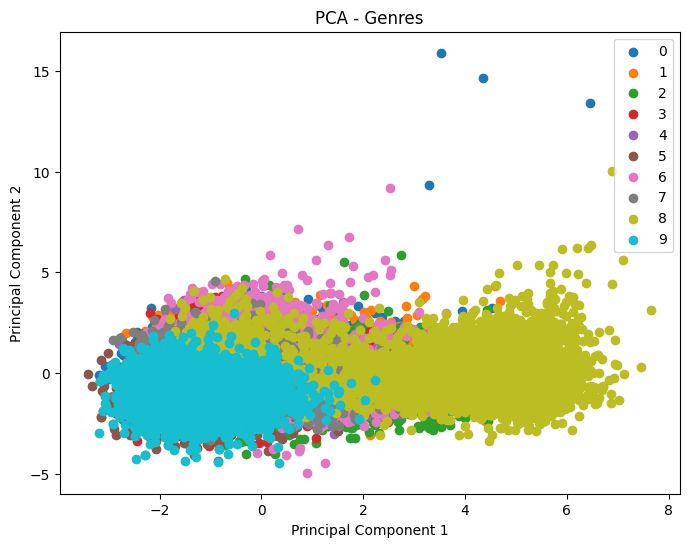

Feature names corresponding to Principal Components:
                popularity  acousticness  danceability  duration_ms    energy  \
pca_component1   -0.252142      0.423094     -0.302799     0.122673 -0.437747   
pca_component2   -0.373024     -0.227723     -0.455951     0.343726  0.318765   

                instrumentalness  liveness  loudness  speechiness     tempo  \
pca_component1          0.338147 -0.084429 -0.456982    -0.174312 -0.146661   
pca_component2          0.109951  0.339901  0.182109    -0.287422  0.345415   

                ...    key_C#     key_D    key_D#     key_E     key_F  \
pca_component1  ... -0.012248  0.002216  0.006207  0.002865  0.005130   
pca_component2  ... -0.013957  0.009430 -0.000784  0.007511 -0.000217   

                  key_F#     key_G    key_G#  mode_Major  mode_Minor  
pca_component1 -0.005086  0.003426 -0.003508    0.003183   -0.003183  
pca_component2 -0.002427  0.008066 -0.006892    0.018367   -0.018367  

[2 rows x 25 columns]


In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# numeric features
numeric_features = ['popularity', 'acousticness', 'danceability', 'duration_ms',
                    'energy', 'instrumentalness', 'liveness', 'loudness',
                    'speechiness', 'tempo', 'valence']

# One-hot encoded features(No standarization needed)
one_hot_features = ['key_A', 'key_A#', 'key_B', 'key_C',
                    'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F',
                    'key_F#', 'key_G', 'key_G#', 'mode_Major', 'mode_Minor']

X_numeric = df[numeric_features].values
X_one_hot = df[one_hot_features].values
y = df['music_genre'].values

# Standardize the numeric features
scaler = StandardScaler()
X_numeric_std = scaler.fit_transform(X_numeric)


X_std = np.concatenate((X_numeric_std, X_one_hot), axis=1)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# show the feature names after the PCA
feature_names = numeric_features + one_hot_features
component_names = ['pca_component1', 'pca_component2']
component_features = pd.DataFrame(pca.components_, columns=feature_names, index=component_names)


plt.figure(figsize=(8, 6))
for genre in set(y):
    indices = y == genre
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=genre)
plt.title('PCA - Genres')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Print the feature names corresponding to the principal components
print("Feature names corresponding to Principal Components:")
print(component_features)





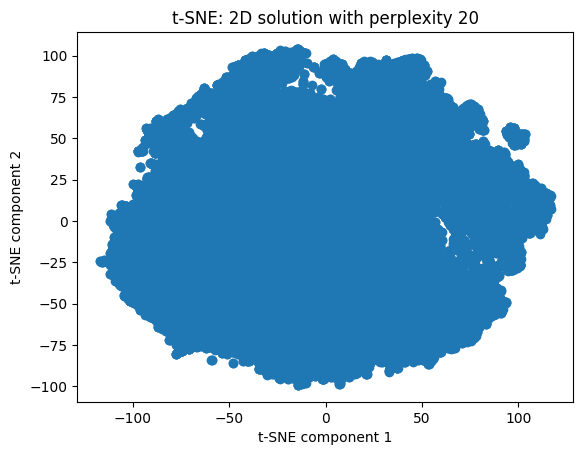

In [23]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



X = df[numeric_features].values
y = df['music_genre'].values

# plot 2D solution with perplexity 20
tsne = TSNE(n_components=2, perplexity=20, random_state=42)
X_tsne = tsne.fit_transform(X_std)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.title('t-SNE: 2D solution with perplexity 20')
plt.show()



* Here， I will preform classification using logistic regression

In [67]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Perform train/test split for each genre
X_train = []
y_train = []
X_test = []
y_test = []

genres = set(y)
for genre in genres:
    genre_indices = np.where(y == genre)[0]
    np.random.shuffle(genre_indices)
    test_indices = genre_indices[:500]
    train_indices = genre_indices[500:5000]
    
    X_train.extend(X_pca[train_indices])
    y_train.extend(y[train_indices])
    X_test.extend(X_pca[test_indices])
    y_test.extend(y[test_indices])

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy_LR_pca = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_LR_pca)

# Calculate the AUC of the model

auc_LR_pca = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
print("AUC:", auc_LR_pca)

Accuracy: 0.2862
AUC: 0.763873111111111


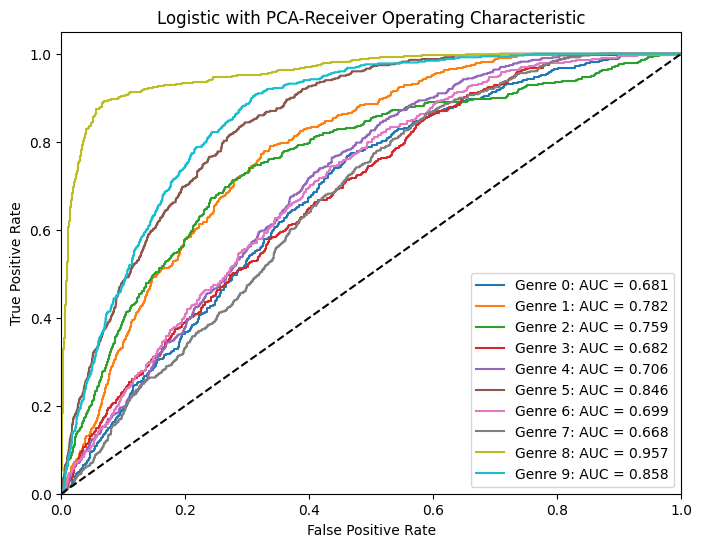

In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


y_pred_prob = model.predict_proba(X_test)


fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(genres)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob[:, i], pos_label=i)
    roc_auc_dict[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(genres)):
    plt.plot(fpr[i], tpr[i], label='Genre {}: AUC = {:.3f}'.format(i, roc_auc_dict[i]))

plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic with PCA-Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [69]:
#I also want to run a Logistic Regression on the training data before it went through demension reduction

# Perform train/test split for each genre
X_train = []
y_train = []
X_test = []
y_test = []

genres = set(y)
for genre in genres:
    genre_indices = np.where(y == genre)[0]
    np.random.shuffle(genre_indices)
    test_indices = genre_indices[:500]
    train_indices = genre_indices[500:5000]
    
    X_train.extend(X_std[train_indices])
    y_train.extend(y[train_indices])
    X_test.extend(X_std[test_indices])
    y_test.extend(y[test_indices])

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy_LR = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_LR)

# Calculate the AUC of the model

auc_LR = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
print("AUC:",auc_LR)

Accuracy: 0.5482
AUC: 0.9101127111111111


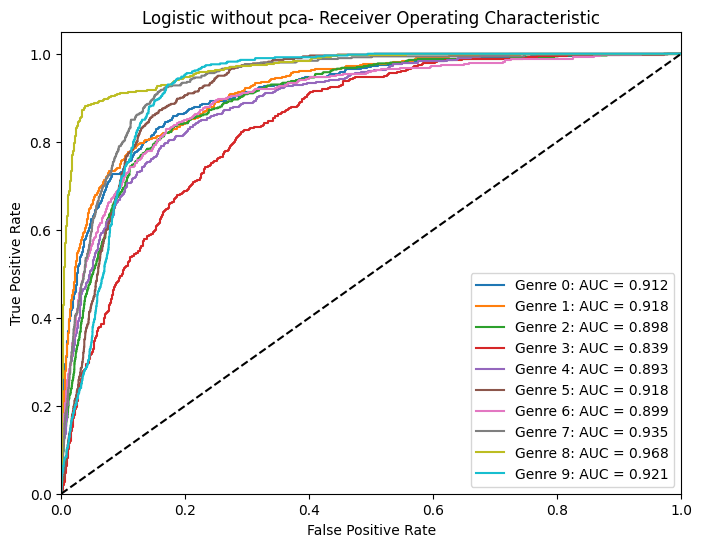

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the predicted probabilities for each class
y_pred_prob = model.predict_proba(X_test)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(genres)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob[:, i], pos_label=i)
    roc_auc_dict[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(genres)):
    plt.plot(fpr[i], tpr[i], label='Genre {}: AUC = {:.3f}'.format(i, roc_auc_dict[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic without pca- Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize an empty list to store accuracy scores for each genre
accuracy_scores = []


# Perform train/test split for each genre
X_train = []
y_train = []
X_test = []
y_test = []

genres = set(y)
for genre in genres:
    genre_indices = np.where(y == genre)[0]
    np.random.shuffle(genre_indices)
    test_indices = genre_indices[:500]
    train_indices = genre_indices[500:5000]
    
    X_train.extend(X_pca[train_indices])
    y_train.extend(y[train_indices])
    X_test.extend(X_pca[test_indices])
    y_test.extend(y[test_indices])

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model for the current genre
accuracy = accuracy_score(y_test, y_pred)
accuracy_scores.append(accuracy)

# Calculate the average accuracy across all genres
average_accuracy_RF_pca = sum(accuracy_scores) / len(accuracy_scores)
print("Average Accuracy:", average_accuracy_RF_pca)

auc_RF_pca = roc_auc_score(y_test, rf_classifier.predict_proba(X_test), multi_class='ovr')
print("AUC:", auc_RF_pca)

Average Accuracy: 0.248
AUC: 0.7193722444444445


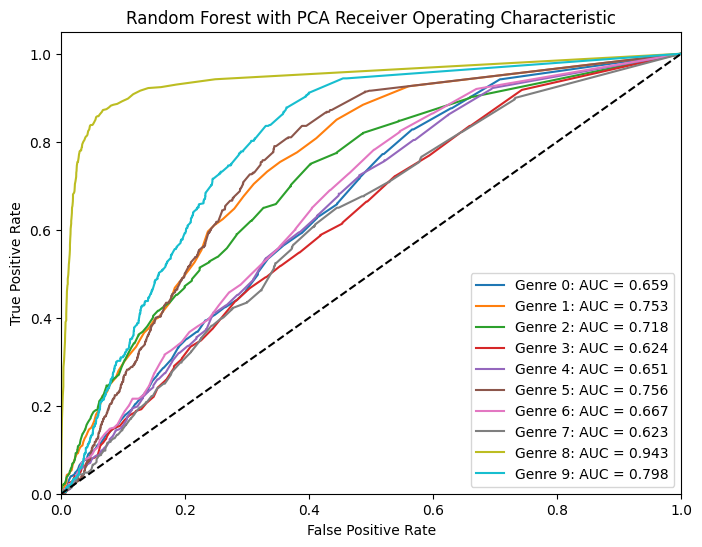

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


y_pred_prob = rf_classifier.predict_proba(X_test)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(genres)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob[:, i], pos_label=i)
    roc_auc_dict[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(genres)):
    plt.plot(fpr[i], tpr[i], label='Genre {}: AUC = {:.3f}'.format(i, roc_auc_dict[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest with PCA Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [61]:
#I also want to run a Random Forest Classifier on the training data before it went through demension reduction
# Initialize an empty list to store accuracy scores for each genre
accuracy_scores = []


# Initialize an empty list to store accuracy scores for each genre
accuracy_scores = []


# Perform train/test split for each genre
X_train = []
y_train = []
X_test = []
y_test = []

genres = set(y)
for genre in genres:
    genre_indices = np.where(y == genre)[0]
    np.random.shuffle(genre_indices)
    test_indices = genre_indices[:500]
    train_indices = genre_indices[500:5000]
    
    X_train.extend(X_std[train_indices])
    y_train.extend(y[train_indices])
    X_test.extend(X_std[test_indices])
    y_test.extend(y[test_indices])

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model for the current genre
accuracy = accuracy_score(y_test, y_pred)
accuracy_scores.append(accuracy)

# Calculate the average accuracy across all genres
average_accuracy_RF = sum(accuracy_scores) / len(accuracy_scores)
print("Average Accuracy:", average_accuracy_RF)

auc_RF = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
print("AUC:", auc_RF)

Average Accuracy: 0.5266
AUC: 0.9028736444444443


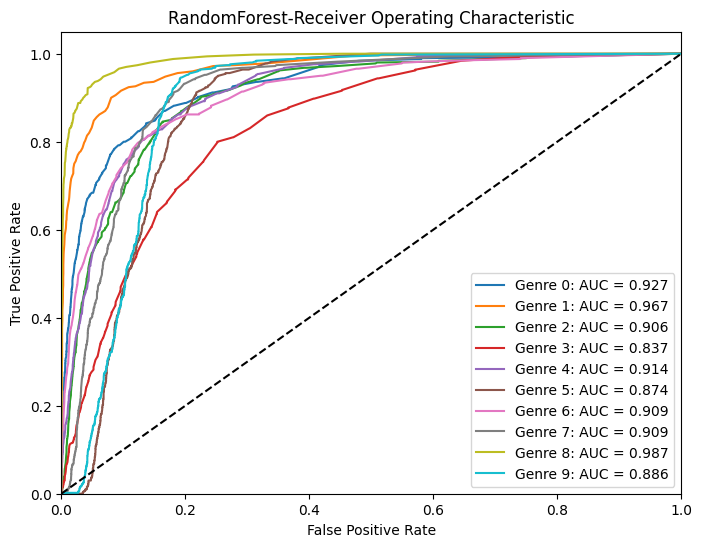

In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


y_pred_prob = rf_classifier.predict_proba(X_test)


fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(len(genres)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_prob[:, i], pos_label=i)
    roc_auc_dict[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(8, 6))
for i in range(len(genres)):
    plt.plot(fpr[i], tpr[i], label='Genre {}: AUC = {:.3f}'.format(i, roc_auc_dict[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest-Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [71]:
#make a table to show results
model_names = ['Logistic Regression after Dimension Reduction', 'Logistic Regression without Dimension Reduction', 'RFC after Dimension Reduction','RFC without Dimension Reduction']


accuracy_scores = [accuracy_LR_pca, accuracy_LR, average_accuracy_RF_pca, average_accuracy_RF] 


auc_scores = [auc_LR_pca, auc_LR,auc_RF_pca , auc_RF]


df_comparison = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores, 'AUC': auc_scores})


print(df_comparison)

                                             Model  Accuracy       AUC
0    Logistic Regression after Dimension Reduction    0.2862  0.763873
1  Logistic Regression without Dimension Reduction    0.5482  0.910113
2                    RFC after Dimension Reduction    0.2480  0.719372
3                  RFC without Dimension Reduction    0.5266  0.902874


In [85]:
average_loudness = df.groupby('artist_name')['loudness'].mean()

top_artists = average_loudness.sort_values(ascending=False).head(5)

In [86]:
print("Top 5 Artists by Average Loudness:")
for artist, loudness in top_artists.iteritems():
    print(f"{artist}: {loudness}")

Top 5 Artists by Average Loudness:
Coachwhips: 1.949
Lil Texas: -0.40275
kradness: -0.5566666666666668
King Khan and the Shrines: -0.748
SVDDEN DEATH: -0.867
